In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [424]:
parents_train = pd.read_csv("data/adv-ml-2025/gen1_train_comp_final.csv")

In [425]:
parents_train

,gen1_id,sex_assigned_at_birth,age,SHgt_cm
0,774,F,0.10,56.961812
1,774,F,0.25,64.826190
2,774,F,0.50,74.340764
3,774,F,0.75,79.747338
4,774,F,1.00,84.092569
...,...,...,...,...
3631,370,F,18.00,174.034011
3632,370,F,18.50,NaN
3633,370,F,19.00,174.233099
3634,370,F,19.50,NaN


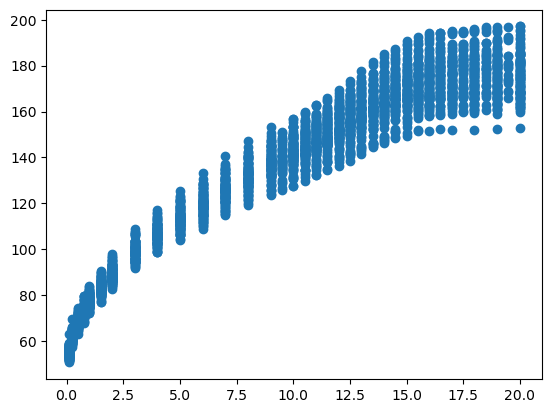

In [426]:
plt.scatter(x="age", y="SHgt_cm", data=parents_train)

In [427]:
parents_train[parents_train["SHgt_cm"].isna()].groupby(
    ["sex_assigned_at_birth", "age"]
).count()

gen1_id  SHgt_cm
sex_assigned_at_birth age                    
F                     0.10         1        0
                      0.25         2        0
                      0.75         2        0
                      1.50         3        0
                      3.00         2        0
                      5.00         2        0
                      6.00         1        0
                      9.50         1        0
                      10.00        1        0
                      15.00        1        0
                      15.50        3        0
                      16.50       19        0
                      17.00        2        0
                      17.50       35        0
                      18.00        1        0
                      18.50       41        0
                      19.00        3        0
                      19.50       47        0
M                     0.10         2        0
                      0.25         3        0
                      0.50         1        0
                      1.00         2        0
                      1.50         1        0
                      2.00         1        0
                      6.00         1        0
                      7.00         1        0
                      9.00         1        0
                      9.50        52        0
                      10.00        2        0
                      11.50        2        0
                      13.00        1        0
                      16.50        4        0
                      17.50       10        0
                      18.50       24        0
                      19.50       35        0

In [428]:
test_code = parents_train.copy()

In [429]:
test_code["SHgt_cm"] = test_code.groupby("gen1_id")["SHgt_cm"].transform(
    lambda x: x.interpolate(method="linear")
)

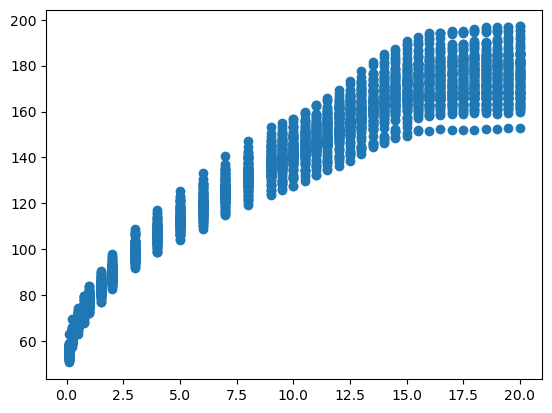

In [430]:
plt.scatter(x="age", y="SHgt_cm", data=test_code)

In [431]:
test_code["SHgt_cm"] = test_code.groupby("gen1_id")["SHgt_cm"].transform(
    lambda x: x.fillna(x.mean())
)

In [432]:
test_code.isna().sum()

gen1_id                  0
sex_assigned_at_birth    0
age                      0
SHgt_cm                  0
dtype: int64

# Basic Random Forest Testing

In [433]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [434]:
X = test_code[["gen1_id", "sex_assigned_at_birth", "age"]]
y = test_code[["SHgt_cm"]].values

In [435]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

#  Check for and handle categorical variables
label_encoder = LabelEncoder()
x_categorical = X.select_dtypes(include=["object"]).apply(
    label_encoder.fit_transform
)
x_numerical = X.select_dtypes(exclude=["object"]).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(
    n_estimators=10, random_state=0, oob_score=True
)

# Fit the regressor with x and y data
regressor.fit(x, y)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [436]:
from sklearn.metrics import mean_squared_error, r2_score

# Access the OOB Score
oob_score = regressor.oob_score_
print(f"Out-of-Bag Score: {oob_score}")

# Making predictions on the same data or new data
predictions = regressor.predict(x)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y, predictions)
print(f"R-squared: {r2}")

Out-of-Bag Score: 0.8117512075395192
Mean Squared Error: 5.507819409871218
R-squared: 0.9962748594173575


In [437]:
x_categorical

,sex_assigned_at_birth
0,0
1,0
2,0
3,0
4,0
...,...
3631,0
3632,0
3633,0
3634,0


In [438]:
trained_data_w_preds = pd.DataFrame(x).rename(
    columns={0: "id", 1: "age", 2: "sex"}
)

In [439]:
trained_data_w_preds["preds"] = predictions

In [440]:
trained_data_w_preds

,id,age,sex,preds
0,774.0,0.10,0.0,55.373041
1,774.0,0.25,0.0,63.732874
2,774.0,0.50,0.0,73.688562
3,774.0,0.75,0.0,77.003862
4,774.0,1.00,0.0,81.957791
...,...,...,...,...
3631,370.0,18.00,0.0,173.963337
3632,370.0,18.50,0.0,174.105932
3633,370.0,19.00,0.0,174.211863
3634,370.0,19.50,0.0,174.363166


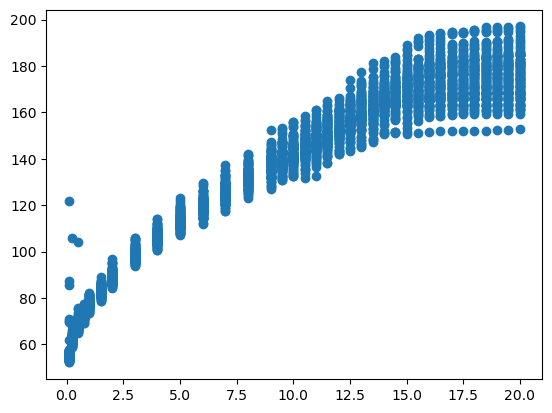

In [441]:
plt.scatter(x="age", y="preds", data=trained_data_w_preds)

In [442]:
compare = trained_data_w_preds.merge(
    test_code, left_on=["id", "age"], right_on=["gen1_id", "age"], how="left"
)

In [443]:
compare["diff"] = compare["preds"] - compare["SHgt_cm"]

In [444]:
compare["id"].unique()

array([774., 771., 768., 764., 753., 750., 748., 746., 732., 727., 725.,
       723., 715., 714., 713., 712., 709., 708., 706., 705., 702., 701.,
       697., 696., 694., 679., 670., 663., 662., 658., 655., 649., 638.,
       636., 634., 633., 630., 615., 612., 611., 605., 604., 602., 596.,
       585., 580., 578., 576., 574., 570., 569., 565., 558., 552., 549.,
       547., 545., 539., 536., 535., 533., 529., 527., 525., 518., 516.,
       515., 510., 509., 508., 505., 502., 500., 497., 495., 490., 489.,
       485., 482., 478., 474., 469., 461., 454., 451., 447., 439., 436.,
       433., 424., 420., 412., 410., 401., 396., 383., 377., 376., 375.,
       371., 370.])

In [445]:
compare[compare["id"] == 508]

,id,age,sex,preds,gen1_id,sex_assigned_at_birth,SHgt_cm,diff
2484,508.0,0.10,1.0,55.588743,508,M,53.667675,1.921068
2485,508.0,0.25,1.0,61.865106,508,M,61.035744,0.829363
2486,508.0,0.50,1.0,68.733328,508,M,67.302052,1.431276
2487,508.0,0.75,1.0,74.150841,508,M,72.660166,1.490675
2488,508.0,1.00,1.0,78.903632,508,M,77.339175,1.564456
2489,508.0,1.50,1.0,83.514661,508,M,82.923832,0.590829
2490,508.0,2.00,1.0,90.250699,508,M,89.287326,0.963373
2491,508.0,3.00,1.0,98.812942,508,M,97.758622,1.054320
2492,508.0,4.00,1.0,106.323095,508,M,105.490076,0.833019
2493,508.0,5.00,1.0,113.760921,508,M,111.920520,1.840401


In [446]:
test_code

,gen1_id,sex_assigned_at_birth,age,SHgt_cm
0,774,F,0.10,56.961812
1,774,F,0.25,64.826190
2,774,F,0.50,74.340764
3,774,F,0.75,79.747338
4,774,F,1.00,84.092569
...,...,...,...,...
3631,370,F,18.00,174.034011
3632,370,F,18.50,174.133555
3633,370,F,19.00,174.233099
3634,370,F,19.50,174.326004


# Gen2 Data Predictions

In [447]:
children = pd.read_csv(
    "/Users/skier/MSDS/Spring1/advML/project/data/adv-ml-2025/gen2_test_upto9_comp_final.csv"
)
children = children.drop("Wgt_kg", axis=1)
children

,gen2_id,sex_assigned_at_birth,study_parent_sex,study_parent_id_new,AgeGr,SHgt_cm
0,2831,F,mother,455,0.10,52.912025
1,2831,F,mother,455,0.25,59.532779
2,2831,F,mother,455,0.50,67.733527
3,2831,F,mother,455,0.75,70.450677
4,2831,F,mother,455,1.00,74.991937
...,...,...,...,...,...,...
1227,2332,M,mother,274,5.00,103.870670
1228,2332,M,mother,274,6.00,109.936726
1229,2332,M,mother,274,7.00,116.386523
1230,2332,M,mother,274,8.00,120.052957


In [448]:
parents_test = pd.read_csv("data/adv-ml-2025/gen1_test_comp_final.csv")

In [449]:
parents_full = pd.concat([parents_test, parents_train], axis=0)
parents_full

,gen1_id,sex_assigned_at_birth,age,SHgt_cm
0,768,F,0.10,53.822825
1,768,F,0.25,61.455579
2,768,F,0.50,69.757527
3,768,F,0.75,73.385477
4,768,F,1.00,78.129137
...,...,...,...,...
3631,370,F,18.00,174.034011
3632,370,F,18.50,NaN
3633,370,F,19.00,174.233099
3634,370,F,19.50,NaN


In [450]:
children_w_parent = children.merge(
    parents_full,
    left_on=["study_parent_id_new", "AgeGr"],
    right_on=["gen1_id", "age"],
    how="left",
).drop(["gen1_id", "sex_assigned_at_birth_y"], axis=1)
children_w_parent[children_w_parent["study_parent_id_new"] == 636]

,gen2_id,sex_assigned_at_birth_x,study_parent_sex,study_parent_id_new,AgeGr,SHgt_cm_x,age,SHgt_cm_y
1120,2657,M,father,636,0.10,54.418386,0.10,53.059688
1121,2657,M,father,636,0.10,54.418386,0.10,53.818812
1122,2657,M,father,636,0.25,58.927064,0.25,60.813498
1123,2657,M,father,636,0.25,58.927064,0.25,61.276841
1124,2657,M,father,636,0.50,64.472311,0.50,69.100127
1125,2657,M,father,636,0.50,64.472311,0.50,68.828343
1126,2657,M,father,636,0.75,69.549711,0.75,74.714810
1127,2657,M,father,636,0.75,69.549711,0.75,75.452930
1128,2657,M,father,636,1.00,71.920240,1.00,78.141631
1129,2657,M,father,636,1.00,71.920240,1.00,77.834870


In [451]:
children_w_parent

,gen2_id,sex_assigned_at_birth_x,study_parent_sex,study_parent_id_new,AgeGr,SHgt_cm_x,age,SHgt_cm_y
0,2831,F,mother,455,0.10,52.912025,NaN,NaN
1,2831,F,mother,455,0.25,59.532779,NaN,NaN
2,2831,F,mother,455,0.50,67.733527,NaN,NaN
3,2831,F,mother,455,0.75,70.450677,NaN,NaN
4,2831,F,mother,455,1.00,74.991937,NaN,NaN
...,...,...,...,...,...,...,...,...
1857,2332,M,mother,274,5.00,103.870670,NaN,NaN
1858,2332,M,mother,274,6.00,109.936726,NaN,NaN
1859,2332,M,mother,274,7.00,116.386523,NaN,NaN
1860,2332,M,mother,274,8.00,120.052957,NaN,NaN


In [452]:
children_w_parent = children_w_parent.rename(
    columns={
        "gen2_id": "child_id",
        "sex_assigned_at_birth_x": "child_sex",
        "study_parent_sex": "parent_sex",
        "study_parent_id_new": "parent_id",
        "AgeGr": "child_age",
        "SHgt_cm_x": "child_height(cm)",
        "age": "parent_age",
        "SHgt_cm_y": "parent_height",
    }
)
children_w_parent

children_w_known_parent = children_w_parent[
    children_w_parent["parent_age"].isna() == False
]

children_w_parent["parent_height"] = children_w_parent.groupby("child_id")[
    "parent_height"
].transform(lambda x: x.interpolate(method="linear"))

non_missing_children_w_known_parent = children_w_known_parent[
    children_w_known_parent["child_height(cm)"].isna() == False
]
non_missing_children_w_known_parent

,child_id,child_sex,parent_sex,parent_id,child_age,child_height(cm),parent_age,parent_height
14,2823,M,mother,665,0.10,56.943083,0.10,56.550000
15,2823,M,mother,665,0.25,62.762152,0.25,61.090817
16,2823,M,mother,665,0.50,69.768578,0.50,68.233684
17,2823,M,mother,665,0.75,75.458808,0.75,73.505668
18,2823,M,mother,665,1.00,80.226826,1.00,76.573379
...,...,...,...,...,...,...,...,...
1829,2504,F,father,623,5.00,106.850400,5.00,108.878133
1830,2504,F,father,623,6.00,112.435157,6.00,113.749173
1831,2504,F,father,623,7.00,116.679299,7.00,119.769676
1832,2504,F,father,623,8.00,123.692319,8.00,125.057073


In [453]:
X = non_missing_children_w_known_parent.drop(["child_height(cm)"], axis=1)
y = non_missing_children_w_known_parent[["child_height(cm)"]].values

In [454]:
label_encoder = LabelEncoder()
x_categorical = X.select_dtypes(include=["object"]).apply(
    label_encoder.fit_transform
)
x_cat = pd.DataFrame(x_categorical).reset_index(drop=True)
x_numerical = X.select_dtypes(exclude=["object"]).values
x_num = pd.DataFrame(x_numerical)
x = pd.concat([x_num, x_cat], axis=1).values

# Fitting Random Forest Regression to the dataset
regressor_testing = RandomForestRegressor(
    n_estimators=10, random_state=0, oob_score=True
)

# Fit the regressor with x and y data
regressor_testing.fit(x, y)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [455]:
child_pred_y = regressor_testing.predict(x)

In [456]:
non_missing_children_w_known_parent

,child_id,child_sex,parent_sex,parent_id,child_age,child_height(cm),parent_age,parent_height
14,2823,M,mother,665,0.10,56.943083,0.10,56.550000
15,2823,M,mother,665,0.25,62.762152,0.25,61.090817
16,2823,M,mother,665,0.50,69.768578,0.50,68.233684
17,2823,M,mother,665,0.75,75.458808,0.75,73.505668
18,2823,M,mother,665,1.00,80.226826,1.00,76.573379
...,...,...,...,...,...,...,...,...
1829,2504,F,father,623,5.00,106.850400,5.00,108.878133
1830,2504,F,father,623,6.00,112.435157,6.00,113.749173
1831,2504,F,father,623,7.00,116.679299,7.00,119.769676
1832,2504,F,father,623,8.00,123.692319,8.00,125.057073


In [457]:
child_preds = pd.DataFrame(x)
child_preds["preds"] = child_pred_y
child_preds = child_preds.rename(
    columns={
        0: "child_id",
        1: "parent_id",
        2: "child_age",
        3: "parent_age",
        4: "parent_height",
        5: "child_sex",
        6: "parent_sex",
    }
)
child_preds

,child_id,parent_id,child_age,parent_age,parent_height,child_sex,parent_sex,preds
0,2823.0,665.0,0.10,0.10,56.550000,1.0,1.0,56.490241
1,2823.0,665.0,0.25,0.25,61.090817,1.0,1.0,61.679384
2,2823.0,665.0,0.50,0.50,68.233684,1.0,1.0,69.425828
3,2823.0,665.0,0.75,0.75,73.505668,1.0,1.0,74.288623
4,2823.0,665.0,1.00,1.00,76.573379,1.0,1.0,79.482839
...,...,...,...,...,...,...,...,...
1425,2504.0,623.0,5.00,5.00,108.878133,0.0,0.0,108.793623
1426,2504.0,623.0,6.00,6.00,113.749173,0.0,0.0,114.913763
1427,2504.0,623.0,7.00,7.00,119.769676,0.0,0.0,116.872625
1428,2504.0,623.0,8.00,8.00,125.057073,0.0,0.0,125.578402


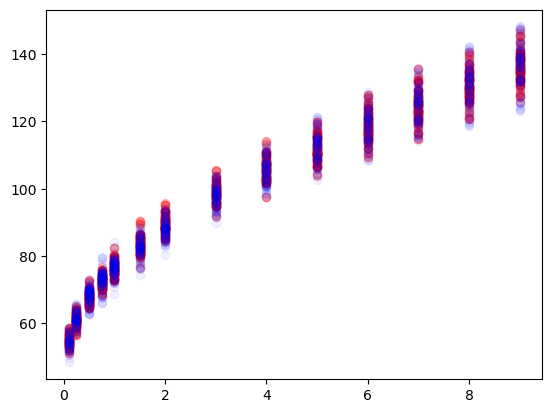

In [478]:
plt.scatter(x="child_age", y="preds", data=child_preds, color="r", alpha=0.2)
plt.scatter(
    x="parent_age",
    y="parent_height",
    data=child_preds,
    color="b",
    alpha=0.05,
)